In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib inline

In [2]:
ds_orig = pd.read_csv('ds-cleaned.csv', index_col="date")
ds = ds_orig
# ds.info

In [3]:
ds.head()

,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,...,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,22.389128,4.77,40.380001,30.572857,26.629999,26.129884,42.070000,37.090000,31.670000,31.469999,...,21.080000,18.719999,25.379999,69.150002,35.330002,8.63,17.100000,25.226457,60.020000,13.33
2010-01-05,22.145923,5.31,40.139999,30.625713,26.440001,25.918773,42.330002,37.700001,31.620001,31.639999,...,20.830000,18.590000,25.059999,69.419998,34.910000,8.64,17.230000,25.140187,61.919998,13.80
2010-01-06,22.067240,5.09,40.490002,30.138571,26.190001,26.062713,42.779999,37.619999,31.559999,31.559999,...,20.870001,18.400000,24.889999,70.019997,35.139999,8.56,17.170000,24.960462,61.900002,15.00
2010-01-07,22.038626,5.24,40.480000,30.082857,25.770000,26.278623,42.740002,36.889999,31.309999,31.230000,...,20.780001,18.400000,24.639999,69.800003,35.599998,8.60,16.700001,24.953272,63.320000,16.68
2010-01-08,22.031474,5.14,40.639999,30.282858,26.049999,26.412967,42.570000,36.689999,31.490000,30.840000,...,20.790001,18.200001,25.000000,69.519997,35.599998,8.57,16.700001,24.960462,61.990002,16.41


## Bartlett’s test of sphericity
checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.


### factor_analyzer.factor_analyzer.calculate_bartlett_sphericity(x)
Test the hypothesis that the correlation matrix is equal to the identity matrix.identity

H0: The matrix of population correlations is equal to I. H1: The matrix of population correlations is not equal to I.

The formula for Bartlett’s Sphericity test is:

−1∗(n−1−((2p+5)/6))∗ln(det(R))
Where R det(R) is the determinant of the correlation matrix, and p is the number of variables.

Parameters:	x (array-like) – The array from which to calculate sphericity.
Returns:	
statistic (float) – The chi-square value.
p_value (float) – The associated p-value for the test.


In [7]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(ds.values)
chi_square_value, p_value

(inf, nan)

## Kaiser-Meyer-Olkin (KMO) Test 
measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
#### Note: Value of KMO less than 0.6 is considered inadequate.

In [4]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(ds)

In [5]:
kmo_model

0.9946056569214845

## ?FactorAnalyzer


Init signature:
FactorAnalyzer(
    n_factors=3,
    rotation='promax',
    method='minres',
    use_smc=True,
    is_corr_matrix=False,
    bounds=(0.005, 1),
    impute='median',
    rotation_kwargs=None,
)
Docstring:     
A FactorAnalyzer class, which -
    (1) Fits a factor analysis model using minres, maximum likelihood,
        or principal factor extraction and returns the loading matrix
    (2) Optionally performs a rotation, with method including:

        (a) varimax (orthogonal rotation)
        (b) promax (oblique rotation)
        (c) oblimin (oblique rotation)
        (d) oblimax (orthogonal rotation)
        (e) quartimin (oblique rotation)
        (f) quartimax (orthogonal rotation)
        (g) equamax (orthogonal rotation)

Parameters
----------
n_factors : int, optional
    The number of factors to select.
    Defaults to 3.
rotation : str, optional
    The type of rotation to perform after
    fitting the factor analysis model.
    If set to None, no rotation will be performed,
    nor will any associated Kaiser normalization.

    Methods include:

        (a) varimax (orthogonal rotation)
        (b) promax (oblique rotation)
        (c) oblimin (oblique rotation)
        (d) oblimax (orthogonal rotation)
        (e) quartimin (oblique rotation)
        (f) quartimax (orthogonal rotation)
        (g) equamax (orthogonal rotation)

    Defaults to 'promax'.

method : {'minres', 'ml', 'principal'}, optional
    The fitting method to use, either MINRES or
    Maximum Likelihood.
    Defaults to 'minres'.
use_smc : bool, optional
    Whether to use squared multiple correlation
    as starting guesses for factor analysis.
    Defaults to True.
bounds : tuple, optional
    The lower and upper bounds on the variables
    for "L-BFGS-B" optimization.
    Defaults to (0.005, 1).
impute : {'drop', 'mean', 'median'}, optional
    If missing values are present in the data, either use
    list-wise deletion ('drop') or impute the column median
    ('median') or column mean ('mean').
use_corr_matrix : bool, optional
    Set to true if the `data` is the correlation
    matrix.
    Defaults to False.
rotation_kwargs, optional
    Additional key word arguments
    are passed to the rotation method.

Attributes
----------
loadings : numpy array
    The factor loadings matrix.
    Default to None, if `analyze()` has not
    been called.
corr : numpy array
    The original correlation matrix.
    Default to None, if `analyze()` has not
    been called.
rotation_matrix : numpy array
    The rotation matrix, if a rotation
    has been performed.
structure :numpy array or None
    The structure loading matrix.
    This only exists if the rotation
    is promax.
psi : numpy array or None
    The factor correlations
    matrix. This only exists
    if the rotation is oblique.

Notes
-----
This code was partly derived from the excellent R package
`psych`.

References
----------
[1] https://github.com/cran/psych/blob/master/R/fa.R

Examples
--------
>>> import pandas as pd
>>> from factor_analyzer import FactorAnalyzer
>>> df_features = pd.read_csv('tests/data/test02.csv')
>>> fa = FactorAnalyzer(rotation=None)
>>> fa.fit(df_features)
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=3, rotation=None, rotation_kwargs={},
        use_smc=True)
>>> fa.loadings_
array([[-0.12991218,  0.16398154,  0.73823498],
       [ 0.03899558,  0.04658425,  0.01150343],
       [ 0.34874135,  0.61452341, -0.07255667],
       [ 0.45318006,  0.71926681, -0.07546472],
       [ 0.36688794,  0.44377343, -0.01737067],
       [ 0.74141382, -0.15008235,  0.29977512],
       [ 0.741675  , -0.16123009, -0.20744495],
       [ 0.82910167, -0.20519428,  0.04930817],
       [ 0.76041819, -0.23768727, -0.1206858 ],
       [ 0.81533404, -0.12494695,  0.17639683]])
>>> fa.get_communalities()
array([0.588758  , 0.00382308, 0.50452402, 0.72841183, 0.33184336,
       0.66208428, 0.61911036, 0.73194557, 0.64929612, 0.71149718])
File:           c:\users\m_ali\miniconda3\lib\site-packages\factor_analyzer\factor_analyzer.py
Type:           type
Subclasses:     

In [6]:
# Create factor analysis object and perform factor analysis

max_num_of_factors = ds.shape[-1] # 470
num_of_factors = round(max_num_of_factors / 10)
# fa = FactorAnalyzer(n_factors = max_num_of_factors, rotation=None) # takes more time, may not work really well.
fa = FactorAnalyzer(n_factors = num_of_factors, rotation=None)
fa.fit(ds)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=47, rotation=None, rotation_kwargs={},
               use_smc=True)

In [16]:
# Check Eigenvalues
orig_ev, common_factor_ev = fa.get_eigenvalues()
print('original_eigen_values\n', orig_ev[:15])
print('common_factor_eigen_values\n', common_factor_ev[:15])

original_eigen_values
 [327.63767646  55.37865746  26.08337242  13.80105008  10.80490517
   5.61848231   4.77586588   3.82652967   2.32056474   2.04260028
   1.68188201   1.46607315   1.19662577   1.01524761   0.94769126]
common_factor_eigen_values
 [327.63227792  55.36946743  26.07118609  13.78913538  10.79077521
   5.60408006   4.76144181   3.81469792   2.30509295   2.02862329
   1.66702101   1.45445977   1.18263983   1.00509054   0.93495245]


The first "15" factors have the eigen-value of more than 1.


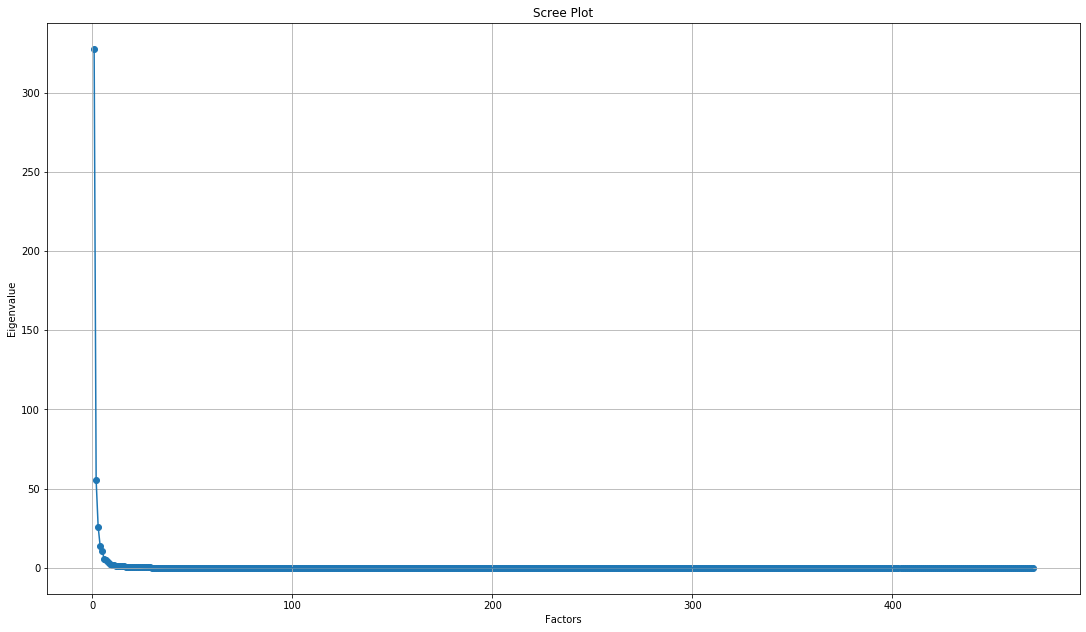

In [18]:
ev_threshhold = 1
for num, elem in enumerate(orig_ev):
    if elem < ev_threshhold:
        print('The first "{}" factors have the eigen-value of more than {}.'.format(num+1, ev_threshhold)); break
        
# Create scree plot using matplotlib
fig = plt.figure()
plt.scatter(range(1,ds.shape[1]+1),orig_ev)
plt.plot(range(1,ds.shape[1]+1),orig_ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()

fig.set_size_inches(18.5, 10.5)
fig.savefig('FA-graphs.png', dpi=100)
plt.show()


In [21]:
fa_loadings_ = pd.DataFrame(fa.loadings_)
fa_loadings_.to_csv('fa_loadings_ds.csv')
fa_loadings_

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,0.929254,0.103986,0.077617,0.251081,0.071905,-0.058743,-0.041477,0.027502,0.055362,0.047810,...,0.008576,0.003631,-0.002112,-0.014201,0.010739,0.002581,0.013398,-0.012770,0.006517,-0.003651
1,0.940553,0.029251,0.179398,-0.165543,0.064637,0.083860,-0.067340,-0.023570,-0.065777,-0.105600,...,-0.002442,-0.018841,-0.001714,0.006486,0.000206,-0.000168,-0.006150,-0.017075,0.004840,-0.018857
2,0.956111,-0.125016,0.040533,-0.103327,0.140813,-0.032391,-0.067038,-0.036164,-0.027264,-0.068477,...,-0.018416,-0.022526,0.029653,-0.005453,-0.007408,0.011057,0.001794,-0.002184,-0.012100,0.010060
3,0.887800,-0.019264,-0.168400,-0.153681,0.278501,0.071099,0.039774,-0.192509,-0.033190,-0.028988,...,0.000629,0.029030,0.012881,0.000530,0.022810,0.014169,-0.002230,0.002116,-0.010916,0.000469
4,0.938755,-0.023445,0.098438,-0.262034,0.139887,-0.036119,0.010723,0.030326,0.036230,0.057458,...,0.000328,0.000357,0.000020,0.011909,0.008331,0.005854,-0.006224,-0.007567,0.004807,0.003763
5,0.940145,0.117865,-0.054335,-0.257899,0.011896,0.068891,0.026780,-0.026318,-0.021644,0.055512,...,0.019161,-0.002107,0.000003,0.033946,0.003302,0.010446,-0.007593,-0.011271,-0.010664,0.000736
6,0.953142,-0.183184,-0.160563,0.082879,-0.023925,-0.088720,0.022632,0.000778,-0.031973,0.064291,...,0.007167,-0.011233,-0.016172,-0.010120,0.003237,-0.002072,0.005010,0.004790,-0.006983,0.010487
7,0.952197,-0.247945,0.095642,0.055116,-0.075030,-0.000729,-0.075924,-0.024014,-0.020985,0.012385,...,0.003693,-0.012590,0.004483,-0.010428,-0.002569,-0.006082,0.001240,0.009949,0.001167,0.004083
8,0.968671,-0.010246,0.008530,0.073078,0.043288,-0.089874,0.105661,-0.085896,-0.007666,0.040933,...,-0.009981,-0.014550,0.021495,-0.006374,-0.005879,-0.017938,0.006713,-0.014288,0.001011,-0.005607
9,0.847480,0.262881,0.328761,-0.020354,0.124468,0.116519,-0.023002,-0.036665,0.041181,-0.013435,...,-0.020307,0.011392,-0.046096,-0.004313,-0.013703,-0.031513,0.007199,0.017829,-0.012531,-0.028616


In [22]:
# Get variance of each factors
pd.DataFrame(fa.get_factor_variance(), index=np.array(['SS Loadings', 'Proportion Var', 'Cumulative Var']),
            columns = 1+np.array(range(num_of_factors)))

,1,2,3,4,5,6,7,8,9,10,...,38,39,40,41,42,43,44,45,46,47
SS Loadings,327.631117,55.369131,26.070905,13.788793,10.790567,5.603787,4.761220,3.814299,2.304882,2.028403,...,0.111002,0.102700,0.098284,0.091789,0.088543,0.083949,0.072506,0.070292,0.070024,0.063716
Proportion Var,0.697087,0.117807,0.055470,0.029338,0.022959,0.011923,0.010130,0.008116,0.004904,0.004316,...,0.000236,0.000219,0.000209,0.000195,0.000188,0.000179,0.000154,0.000150,0.000149,0.000136
Cumulative Var,0.697087,0.814894,0.870364,0.899702,0.922661,0.934584,0.944714,0.952829,0.957733,0.962049,...,0.991186,0.991405,0.991614,0.991809,0.991997,0.992176,0.992330,0.992480,0.992629,0.992764


### Pros and Cons of Factor Analysis
Factor analysis explores large dataset and finds interlinked associations. It reduces the observed variables into a few unobserved variables or identifies the groups of inter-related variables, which help the market researchers to compress the market situations and find the hidden relationship among consumer taste, preference, and cultural influence. Also, It helps in improve questionnaire in for future surveys. Factors make for more natural data interpretation.

Results of factor analysis are controversial. Its interpretations can be debatable because more than one interpretation can be made of the same data factors. 
#### After factor identification and naming of factors requires domain knowledge.

In [26]:
max_num_of_factors = ds.shape[-1] # 470
num_of_factors = round(max_num_of_factors / 100)
# fa = FactorAnalyzer(n_factors = max_num_of_factors, rotation=None) # takes more time, may not work really well.
fa = FactorAnalyzer(n_factors = num_of_factors, rotation=None)
fa.fit(ds)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=5, rotation=None, rotation_kwargs={},
               use_smc=True)

In [27]:
pd.DataFrame(fa.loadings_)

,0,1,2,3,4
0,0.929196,0.104029,0.077555,0.250807,0.075009
1,0.940490,0.029338,0.179692,-0.165843,0.062927
2,0.956087,-0.124959,0.040737,-0.104705,0.139901
3,0.887657,-0.019171,-0.168124,-0.156269,0.276692
4,0.938783,-0.023374,0.098878,-0.263822,0.137525
5,0.940135,0.117994,-0.054158,-0.258468,0.008967
6,0.953158,-0.183203,-0.160822,0.083071,-0.023138
7,0.952244,-0.248038,0.095858,0.056152,-0.074887
8,0.968596,-0.010188,0.008570,0.072728,0.044204
9,0.847338,0.262788,0.328636,-0.020888,0.124224


In [28]:
# Get variance of each factors
pd.DataFrame(fa.get_factor_variance(), index=np.array(['SS Loadings', 'Proportion Var', 'Cumulative Var']),
            columns = 1+np.array(range(num_of_factors)))

,1,2,3,4,5
SS Loadings,327.582940,55.278911,25.944567,13.682766,10.637179
Proportion Var,0.696985,0.117615,0.055201,0.029112,0.022632
Cumulative Var,0.696985,0.814600,0.869801,0.898913,0.921545
